In [137]:
#Importing necessarylibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
#Loading the file into a variable bb
bb=pd.read_csv("C:/IIIT Bangalore/Course 2/Multiple Regression Assignment/day.csv")

#### Performing prima facie checks

In [139]:
bb.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [140]:
bb.size

11680

In [141]:
bb.shape

(730, 16)

In [142]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [143]:
bb.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

As there's no Null value in any of the Columns, let's proceed Data Preparation

As suggested, dropping __instant__, __dteday__, __casual__, __registered__ .

In [144]:
bb.drop(['instant', 'dteday', 'casual', 'registered'],axis=1,inplace=True)

In [145]:
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [146]:
bb.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Performing __Univariate__ and __Bivariate__ Analysis

In [147]:
#Checking yr
bb.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [148]:
#Validating change
bb.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [149]:
#Checking season variable
bb.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

<Figure size 1080x504 with 0 Axes>

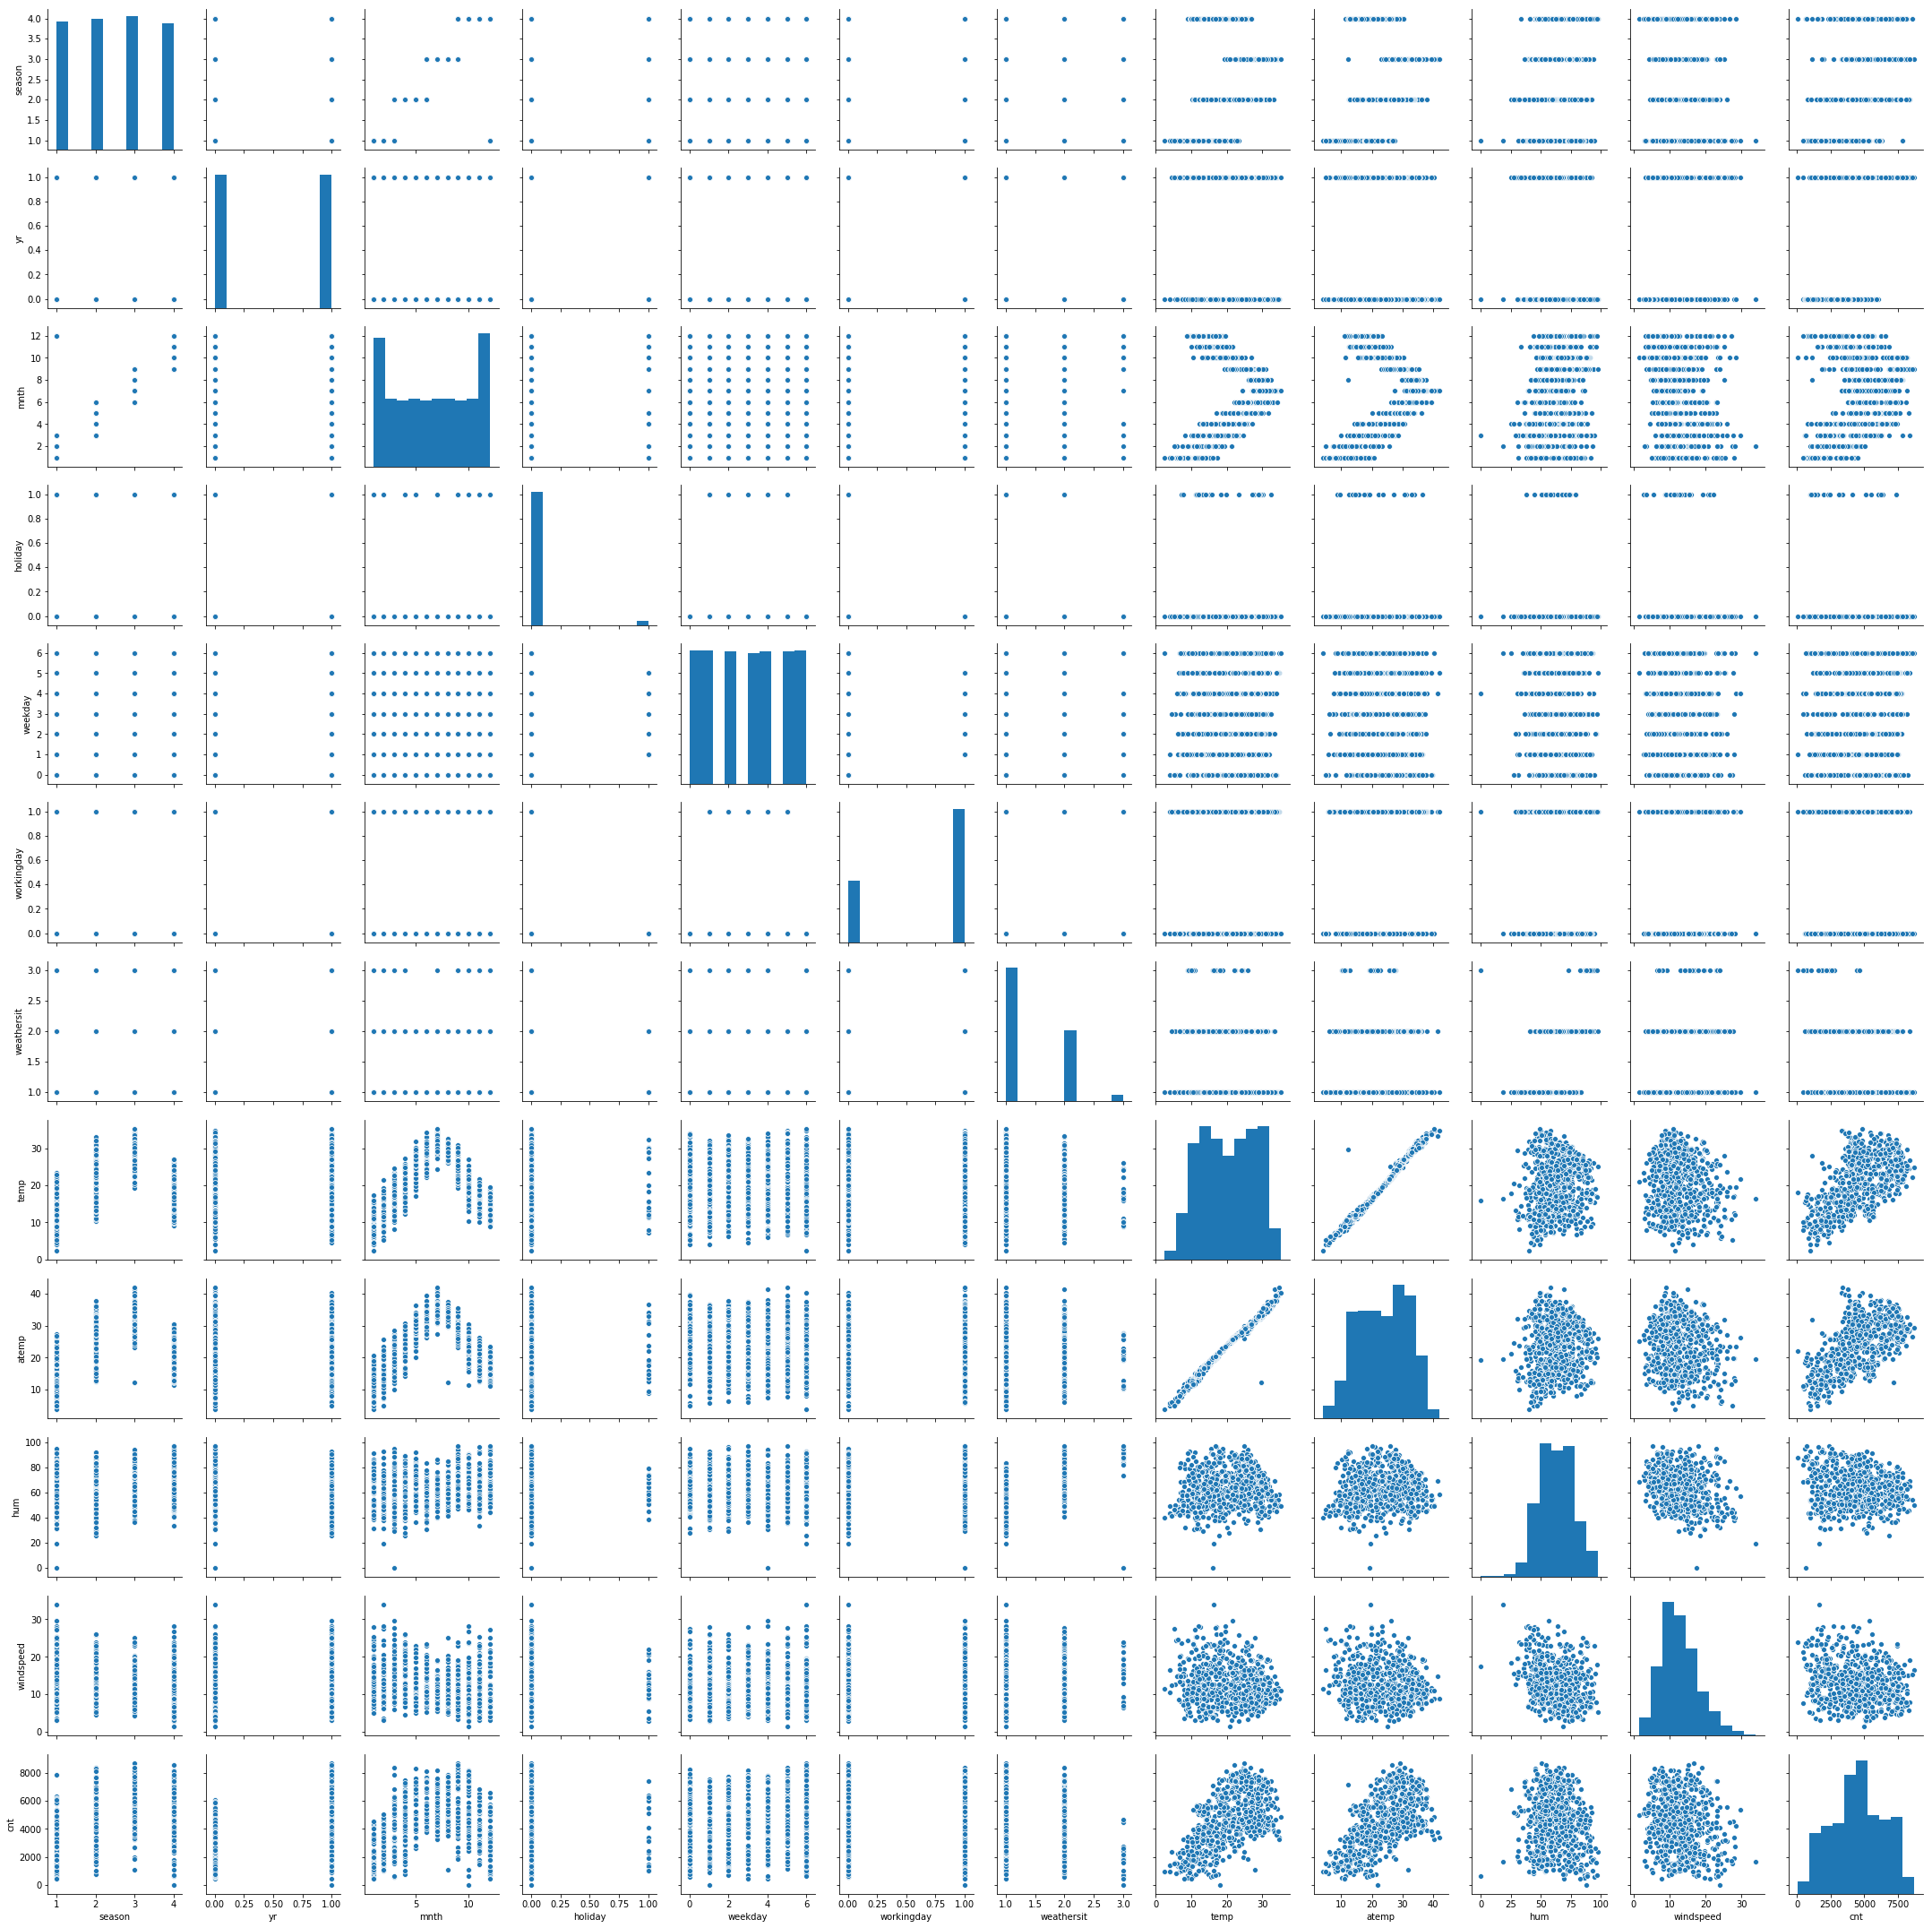

In [150]:
#Using pairplot to understand correlation of the columns onto each other.
plt.figure(figsize=[15,7])
sns.pairplot(bb)
plt.show()

In [104]:
#Labelling the variables
bb.season=bb.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [105]:
bb.season.dtypes

dtype('O')

In [106]:
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [107]:
#Checking yr column
bb.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [108]:
bb.yr=bb.yr.map({0:'2018',1:'2019'})

In [109]:
#Validating Datatype
bb.yr.dtypes

dtype('O')

In [110]:
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [111]:
#Validating change
bb.yr.value_counts()

2019    365
2018    365
Name: yr, dtype: int64

In [112]:
#Checking mnth column
bb.mnth.dtypes

dtype('int64')

In [113]:
bb.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [114]:
#Labelling
bb.mnth=bb.mnth.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [115]:
#Validating the data
bb.mnth.value_counts()

May          62
July         62
March        62
August       62
January      62
October      62
December     62
April        60
November     60
June         60
September    60
February     56
Name: mnth, dtype: int64

In [116]:
bb.mnth.dtypes

dtype('O')

In [117]:
#Checking weekday column
bb.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [118]:
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,January,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,January,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,January,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,January,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,January,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [119]:
#Verifying if 0 is Monday
bb.loc[(bb.weekday==0) & (bb.workingday==1)].shape

(0, 12)

In the above code we considered 0 as Monday. We will therefore check the rows with weekday as 0 and workingday as 1.

__The output proves that there are no rows if we consider Monday as 0.__

Thus we map __0__ as __Sunday__.

In [120]:
#Labelling
bb.weekday=bb.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [121]:
#Validating the change
bb.weekday.value_counts()

Monday       105
Sunday       105
Saturday     105
Thursday     104
Tuesday      104
Friday       104
Wednesday    103
Name: weekday, dtype: int64

In [122]:
bb.weekday.dtypes

dtype('O')

In [123]:
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,January,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,January,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,January,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,January,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,January,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [124]:
#Checking Holiday
bb.holiday.dtypes

dtype('int64')

In [125]:
#Labelling
bb.holiday=bb.holiday.map({0:'No',1:'Yes'})
bb.holiday.dtypes

dtype('O')

In [126]:
#Validating change
bb.holiday.value_counts()

No     709
Yes     21
Name: holiday, dtype: int64

In [127]:
#Checking workingday
bb.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [128]:
bb.workingday.dtypes

dtype('int64')

In [129]:
#Labelling
bb.workingday=bb.workingday.map({0:'No',1:'Yes'})
bb.workingday.dtypes

dtype('O')

In [130]:
bb.weathersit.value_counts(normalize=True)

1    0.634247
2    0.336986
3    0.028767
Name: weathersit, dtype: float64

According to the Data Dictionary, Level 1 of weathersit refers to a decent weather. As we move towards Level 4, the weather worsens. 

Thus if we were to compute severity of weather, we could infer that __Level 1__ is __Low__, __Level 2__ is __Medium__, __Level 3__ is __High__ and __Level 4__ is __Critical__. 

In [131]:
#Labelling
bb.weathersit=bb.weathersit.map({1:'Low',2:'Medium',3:'High',4:'Critical'})

In [132]:
bb.weathersit.value_counts(normalize=True)

Low       0.634247
Medium    0.336986
High      0.028767
Name: weathersit, dtype: float64

In [133]:
#Now that necessary columns have been made into Object data type. Let's proceed with dummy column creation
bb.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [134]:
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,January,No,Saturday,No,Medium,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,January,No,Sunday,No,Medium,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,January,No,Monday,Yes,Low,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,January,No,Tuesday,Yes,Low,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,January,No,Wednesday,Yes,Low,9.305237,11.46350,43.6957,12.522300,1600


#### Adding Dummy Columns

In [46]:
#Checking yr column
bb.yr.value_counts()

2019    365
2018    365
Name: yr, dtype: int64

In [47]:
yr_dummies=pd.get_dummies(bb.yr,drop_first=True)
bb=pd.concat([bb,yr_dummies],axis=1,)

In [48]:
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,2019
0,Spring,2018,January,No,Saturday,No,Medium,14.110847,18.18125,80.5833,10.749882,985,0
1,Spring,2018,January,No,Sunday,No,Medium,14.902598,17.68695,69.6087,16.652113,801,0
2,Spring,2018,January,No,Monday,Yes,Low,8.050924,9.47025,43.7273,16.636703,1349,0
3,Spring,2018,January,No,Tuesday,Yes,Low,8.200000,10.60610,59.0435,10.739832,1562,0
4,Spring,2018,January,No,Wednesday,Yes,Low,9.305237,11.46350,43.6957,12.522300,1600,0


In [49]:
#Dropping yr column
bb.drop('yr',axis=1,inplace=True)

In [50]:
bb.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,2019
0,Spring,January,No,Saturday,No,Medium,14.110847,18.18125,80.5833,10.749882,985,0
1,Spring,January,No,Sunday,No,Medium,14.902598,17.68695,69.6087,16.652113,801,0
2,Spring,January,No,Monday,Yes,Low,8.050924,9.47025,43.7273,16.636703,1349,0
3,Spring,January,No,Tuesday,Yes,Low,8.200000,10.60610,59.0435,10.739832,1562,0
4,Spring,January,No,Wednesday,Yes,Low,9.305237,11.46350,43.6957,12.522300,1600,0


In [51]:
bb.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [52]:
#Creating Dummy columns
season_dummies=pd.get_dummies(bb.season,drop_first=True)
bb=pd.concat([bb,season_dummies],axis=1)

In [53]:
season_dummies.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [54]:
#Dropping Season column
bb.drop('season',axis=1,inplace=True)

In [55]:
#Validating change
bb.head()

,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,2019,Spring,Summer,Winter
0,January,No,Saturday,No,Medium,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0
1,January,No,Sunday,No,Medium,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0
2,January,No,Monday,Yes,Low,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0
3,January,No,Tuesday,Yes,Low,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0
4,January,No,Wednesday,Yes,Low,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0


In [56]:
#Moving on to mnth column
month_dummies=pd.get_dummies(bb.mnth)
month_dummies.drop('January',axis=1,inplace=True)
month_dummies.head()

,April,August,December,February,July,June,March,May,November,October,September
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [57]:
#Joining the dummies dataframe month_dummies with the our dataset bb
bb=pd.concat([bb,month_dummies],axis=1)

In [58]:
#Dropping mnth column, now that the dummies have been created
bb.drop('mnth',axis=1,inplace=True)

In [59]:
#Validating change
bb.columns

Index(['holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', '2019', 'Spring', 'Summer', 'Winter',
       'April', 'August', 'December', 'February', 'July', 'June', 'March',
       'May', 'November', 'October', 'September'],
      dtype='object')

In [60]:
#Creating dummy variables
holiday_dummies=pd.get_dummies(bb.holiday,prefix='holiday',drop_first=True)
#Combining this and our dataframe
bb=pd.concat([bb,holiday_dummies],axis=1)

In [61]:
#Validating change
print(bb.head())
print(bb.columns)

  holiday    weekday workingday weathersit       temp     atemp      hum  \
0      No   Saturday         No     Medium  14.110847  18.18125  80.5833   
1      No     Sunday         No     Medium  14.902598  17.68695  69.6087   
2      No     Monday        Yes        Low   8.050924   9.47025  43.7273   
3      No    Tuesday        Yes        Low   8.200000  10.60610  59.0435   
4      No  Wednesday        Yes        Low   9.305237  11.46350  43.6957   

   windspeed   cnt  2019     ...       December  February  July  June  March  \
0  10.749882   985     0     ...              0         0     0     0      0   
1  16.652113   801     0     ...              0         0     0     0      0   
2  16.636703  1349     0     ...              0         0     0     0      0   
3  10.739832  1562     0     ...              0         0     0     0      0   
4  12.522300  1600     0     ...              0         0     0     0      0   

   May  November  October  September  holiday_Yes  
0    0    

In [62]:
#Dropping holiday column
bb.drop('holiday',axis=1,inplace=True)

In [63]:
bb.columns

Index(['weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', '2019', 'Spring', 'Summer', 'Winter', 'April',
       'August', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'holiday_Yes'],
      dtype='object')

In [64]:
#Creating dummy columns from weekday
weekday_dummies=pd.get_dummies(bb.weekday)
weekday_dummies.drop('Sunday',axis=1,inplace=True)

In [65]:
bb=pd.concat([bb,weekday_dummies],axis=1)

In [66]:
#Dropping weekday column
bb.drop('weekday',axis=1,inplace=True)

In [67]:
#Validating change
bb.columns

Index(['workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       '2019', 'Spring', 'Summer', 'Winter', 'April', 'August', 'December',
       'February', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'holiday_Yes', 'Friday', 'Monday', 'Saturday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

In [68]:
bb.workingday.value_counts()

Yes    499
No     231
Name: workingday, dtype: int64

In [69]:
#Moving on to workingday
working_dummies=pd.get_dummies(bb.workingday,prefix='working',drop_first=True)

In [70]:
working_dummies.head()

,working_Yes
0,0
1,0
2,1
3,1
4,1


In [71]:
#Concatenating
bb=pd.concat([bb,working_dummies],axis=1)

In [72]:
bb.head()

,workingday,weathersit,temp,atemp,hum,windspeed,cnt,2019,Spring,Summer,...,October,September,holiday_Yes,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,working_Yes
0,No,Medium,14.110847,18.18125,80.5833,10.749882,985,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,No,Medium,14.902598,17.68695,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Yes,Low,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,Yes,Low,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,Yes,Low,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [73]:
#Dropping workingday
bb.drop('workingday',axis=1,inplace=True)

In [74]:
#Validating change
bb.columns

Index(['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', '2019',
       'Spring', 'Summer', 'Winter', 'April', 'August', 'December', 'February',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'holiday_Yes', 'Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday',
       'Wednesday', 'working_Yes'],
      dtype='object')

In [75]:
#creating dummy columns for weathersit
weather_dummy=pd.get_dummies(bb.weathersit,prefix='weather')

In [76]:
#Joining dataframes
bb=pd.concat([bb,weather_dummy],axis=1)

In [77]:
#Dropping weathersit column
bb.drop('weathersit',axis=1,inplace=True)

In [78]:
#validating change
bb.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', '2019', 'Spring', 'Summer',
       'Winter', 'April', 'August', 'December', 'February', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'holiday_Yes',
       'Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday',
       'working_Yes', 'weather_High', 'weather_Low', 'weather_Medium'],
      dtype='object')

In [79]:
bb.head()

,temp,atemp,hum,windspeed,cnt,2019,Spring,Summer,Winter,April,...,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,working_Yes,weather_High,weather_Low,weather_Medium
0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0


### Creating Train and Test data

In [80]:
import sklearn
from sklearn.model_selection import train_test_split

In [81]:
bb_train,bb_test=train_test_split(bb,train_size=0.7,random_state=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [82]:
print(bb_train.shape)
print(bb_test.shape)

(510, 31)
(220, 31)


In [83]:
#Now that we have the Train set, let's scale the variables to provide uniformity.
#We are proceeding with MinMaxScaler approach.
from sklearn.preprocessing import MinMaxScaler

In [84]:
print(bb.cnt.dtypes)

int64


In [85]:
bb.head()

,temp,atemp,hum,windspeed,cnt,2019,Spring,Summer,Winter,April,...,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,working_Yes,weather_High,weather_Low,weather_Medium
0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [86]:
#Creating a MinMaxScaler object.
scaler=MinMaxScaler()
scaler

#Selecting the Numeric variables that we would scale.
variables=['temp','atemp','hum','windspeed','cnt']

In [87]:
bb_train[variables]=scaler.fit_transform(bb_train[variables])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [88]:
#Validating the check
bb_train.describe()

,temp,atemp,hum,windspeed,cnt,2019,Spring,Summer,Winter,April,...,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,working_Yes,weather_High,weather_Low,weather_Medium
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.507843,0.243137,0.247059,0.247059,0.078431,...,0.127451,0.150980,0.154902,0.133333,0.131373,0.158824,0.676471,0.029412,0.625490,0.345098
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.500429,0.429398,0.431725,0.431725,0.269113,...,0.333805,0.358381,0.362166,0.340268,0.338139,0.365870,0.468282,0.169124,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.529718,0.653714,0.296763,0.518638,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We could observe that Max for all the variables is 1 and Min is 0. Thus all variables are scaled

In [356]:
#Checking correlation amongst the variables
bb_train.corr()

,temp,atemp,hum,windspeed,cnt,2019,Spring,Summer,Winter,April,...,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,working_Yes,weather_High,weather_Low,weather_Medium
temp,1.000000,0.989539,0.155252,-0.187281,0.645048,0.108054,-0.606396,0.126057,-0.234200,-0.050823,...,0.015642,-0.032455,-0.042608,0.002518,0.048662,0.029020,0.068326,-3.622709e-02,0.100510,-0.089452
atemp,0.989539,1.000000,0.169341,-0.215108,0.647944,0.104971,-0.611118,0.136550,-0.211852,-0.040464,...,0.001289,-0.025473,-0.043785,0.006022,0.051493,0.027554,0.068349,-4.439780e-02,0.099074,-0.085086
hum,0.155252,0.169341,1.000000,-0.267126,-0.058793,-0.084061,-0.201616,-0.014192,0.173980,-0.133153,...,-0.016457,0.022296,-0.040858,-0.038530,0.012087,0.046866,0.032525,2.449653e-01,-0.556435,0.479436
windspeed,-0.187281,-0.215108,-0.267126,1.000000,-0.253038,-0.000439,0.180351,0.110441,-0.090740,0.183324,...,-0.016023,-0.004658,0.049063,-0.004620,-0.004101,-0.019862,-0.042704,8.677832e-02,-0.000932,-0.029892
cnt,0.645048,0.647944,-0.058793,-0.253038,1.000000,0.591433,-0.548987,0.140259,0.025945,0.023172,...,0.024805,-0.009333,-0.015998,0.009928,0.030528,0.025468,0.092019,-2.266784e-01,0.245832,-0.169715
2019,0.108054,0.104971,-0.084061,-0.000439,0.591433,1.000000,-0.036320,0.018294,-0.027174,0.053776,...,-0.011876,0.053634,-0.033817,-0.006153,-0.000296,-0.001452,0.031808,-6.076399e-02,0.032398,-0.011388
Spring,-0.606396,-0.611118,-0.201616,0.180351,-0.548987,-0.036320,1.000000,-0.324666,-0.324666,-0.165348,...,0.016394,-0.009212,0.022641,0.006275,-0.030988,-0.008680,-0.037932,-4.455809e-02,0.004148,0.011613
Summer,0.126057,0.136550,-0.014192,0.110441,0.140259,0.018294,-0.324666,1.000000,-0.328125,0.509286,...,-0.014435,-0.000299,-0.019069,-0.024073,0.032932,0.037167,0.046302,-4.590079e-02,-0.026411,0.043202
Winter,-0.234200,-0.211852,0.173980,-0.090740,0.025945,-0.027174,-0.324666,-0.328125,1.000000,-0.167109,...,-0.041700,0.037795,0.018626,-0.010699,-0.020899,-0.025022,-0.060593,1.155434e-01,-0.063983,0.024076
April,-0.050823,-0.040464,-0.133153,0.183324,0.023172,0.053776,-0.165348,0.509286,-0.167109,1.000000,...,-0.002144,0.019572,-0.003952,-0.028606,0.016087,-0.007042,-0.000917,-7.617551e-03,0.014773,-0.012333


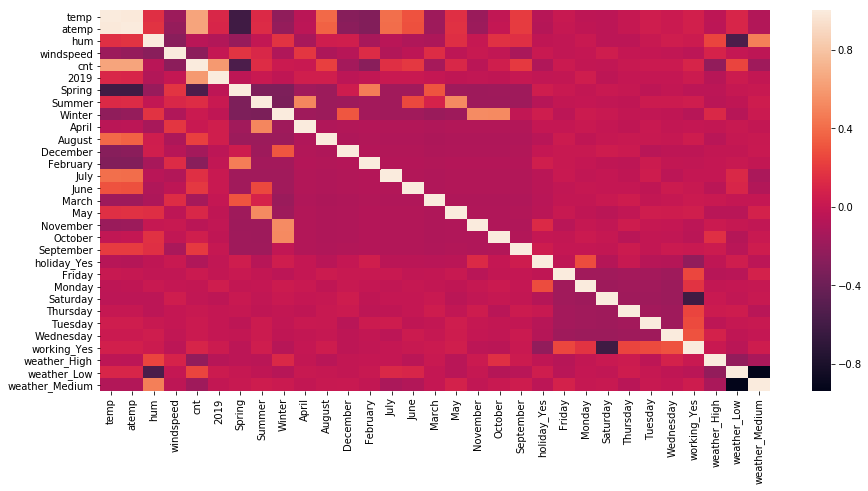

In [357]:
#Checking graphically for highest correlations
plt.figure(figsize=[15,7])
sns.heatmap(bb_train.corr())
plt.show()

In [358]:
#Now moving the target variable cnt in y_train and the remaining in X_train
y_train=bb_train.pop('cnt')
X_train=bb_train

In [359]:
X_train.head()

,temp,atemp,hum,windspeed,2019,Spring,Summer,Winter,April,August,...,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,working_Yes,weather_High,weather_Low,weather_Medium
576,0.815169,0.766351,0.725633,0.264686,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
426,0.442393,0.438975,0.640189,0.255342,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
482,0.395666,0.391735,0.504508,0.188475,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0.345824,0.318819,0.751824,0.380981,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [360]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [361]:
#cnt is the target variable. Checking Top 20 variables that have a high correlation with our target variables
bb_train.corrwith(bb.cnt).sort_values(ascending=False)[:20]

atemp          0.647944
temp           0.645048
2019           0.591433
weather_Low    0.245832
August         0.227578
September      0.201639
June           0.195411
July           0.158087
Summer         0.140259
May            0.113276
working_Yes    0.092019
October        0.055558
Tuesday        0.030528
Winter         0.025945
Wednesday      0.025468
Friday         0.024805
April          0.023172
Thursday       0.009928
Monday        -0.009333
Saturday      -0.015998
dtype: float64

In [362]:
#Importing statsmodels.api as we would need a constant as we build the model
import statsmodels.api as sm

In [363]:
X_train.corrwith(X_train['atemp'])[:1]

temp    0.989539
dtype: float64

In [364]:
#Adding constant to our variable. As we checked the Top 20 variables with high correlation with our target variable. 
#Adding First column atemp
X_train_sm=X_train['atemp']
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [365]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           4.77e-62
Time:                        21:28:45   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.000       0.123       0.201
atemp          0.6846      0.036     19.173      0.000       0.614       0.755
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [366]:
#Since the R-squared is 0.416, let's just try adding one more variable. We will add the second highest correlated variable
X_train_sm=X_train[['atemp','temp']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [367]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           8.38e-61
Time:                        21:28:46   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.000       0.124       0.202
atemp          0.4896      0.248      1.977      0.049       0.003       0.976
temp           0.1853      0.233      0.796      0.426      -0.272       0.643
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [368]:
#Let's try and add the variable one by one.
#Adding the first 5 columns with correlation.
X_train_sm=sm.add_constant(X_train[['temp','atemp','weather_Low','August','September']])
X_train_sm.head()

,const,temp,atemp,weather_Low,August,September
576,1.0,0.815169,0.766351,1,0,0
426,1.0,0.442393,0.438975,0,0,0
728,1.0,0.245101,0.200348,1,0,0
482,1.0,0.395666,0.391735,0,0,0
111,1.0,0.345824,0.318819,0,0,0


In [369]:
#Creating a model and fitting it
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [370]:
#Checking parameters
lr_model.params

const          0.123210
temp           0.129029
atemp          0.504862
weather_Low    0.088083
August         0.009865
September      0.072498
dtype: float64

In [371]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     86.14
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           2.40e-65
Time:                        21:28:47   Log-Likelihood:                 196.41
No. Observations:                 510   AIC:                            -380.8
Df Residuals:                     504   BIC:                            -355.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1232      0.021      5.823      0.000       0.082       0.165
temp            0.1290      0.232      0.555      0.579      -0.327       0.585
atemp           0.5049      0.243      2.074      0.039       0.027       0.983
weather_Low     0.0881      0.015      5.758      0.000       0.058       0.118
August          0.0099      0.028      0.352      0.725      -0.045       0.065
September       0.0725      0.028      2.568      0.011       0.017       0.128
==============================================================================
Omnibus:                        6.235   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                4.405
Skew:                           0.080   Prob(JB):                        0.111
Kurtosis:                       2.574   Cond. No.                         65.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [372]:
#Meanwhile we will check VIF score too for the added variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [373]:
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,51.09
2,atemp,49.63
0,const,8.33
4,August,1.27
5,September,1.10
3,weather_Low,1.02


We could see that the VIF is too high for temp and atemp. At such cases, it is advisable that we drop variables with high significance and high VIF
The above case is applicable for __temp__ variable. We proceed and drop that variable

In [374]:
X_train_sm=X_train[['atemp','weather_Low','August','September']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [375]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     107.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           2.53e-66
Time:                        21:28:48   Log-Likelihood:                 196.25
No. Observations:                 510   AIC:                            -382.5
Df Residuals:                     505   BIC:                            -361.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1234      0.021      5.838      0.000       0.082       0.165
atemp           0.6384      0.039     16.533      0.000       0.563       0.714
weather_Low     0.0884      0.015      5.783      0.000       0.058       0.118
August          0.0136      0.027      0.502      0.616      -0.040       0.067
September       0.0736      0.028      2.618      0.009       0.018       0.129
==============================================================================
Omnibus:                        4.832   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                3.727
Skew:                           0.089   Prob(JB):                        0.155
Kurtosis:                       2.621   Cond. No.                         8.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [376]:
#Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,8.32
1,atemp,1.25
3,August,1.19
4,September,1.09
2,weather_Low,1.02


Inferences to draw from the above model:
- September, weather_Low, atemp are significant.
- August variable has low VIF, but a high p-value.

In [377]:
#Lets try removing August variable and check the significance of rest of the variables
X_train_sm=X_train[['atemp','weather_Low','September']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [378]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     143.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           2.20e-67
Time:                        21:28:48   Log-Likelihood:                 196.12
No. Observations:                 510   AIC:                            -384.2
Df Residuals:                     506   BIC:                            -367.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1213      0.021      5.861      0.000       0.081       0.162
atemp           0.6460      0.035     18.201      0.000       0.576       0.716
weather_Low     0.0880      0.015      5.769      0.000       0.058       0.118
September       0.0710      0.028      2.571      0.010       0.017       0.125
==============================================================================
Omnibus:                        4.817   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                3.723
Skew:                           0.089   Prob(JB):                        0.155
Kurtosis:                       2.622   Cond. No.                         7.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [379]:
#Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,7.98
1,atemp,1.06
3,September,1.05
2,weather_Low,1.02


Inferences from the above model:
- All the variables atemp, September, weather_Low are significant
- VIF for the variables is under 2

In [380]:
#Top 20 variables with high correlation
bb_train.corrwith(bb.cnt).sort_values(ascending=False)[:20]

atemp          0.647944
temp           0.645048
2019           0.591433
weather_Low    0.245832
August         0.227578
September      0.201639
June           0.195411
July           0.158087
Summer         0.140259
May            0.113276
working_Yes    0.092019
October        0.055558
Tuesday        0.030528
Winter         0.025945
Wednesday      0.025468
Friday         0.024805
April          0.023172
Thursday       0.009928
Monday        -0.009333
Saturday      -0.015998
dtype: float64

In [381]:
#Let's add few more variables to see if the model is improved
X_train_sm=X_train[['atemp','weather_Low','September','June','July','Summer','May']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [382]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     65.75
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           5.73e-67
Time:                        21:28:50   Log-Likelihood:                 204.83
No. Observations:                 510   AIC:                            -393.7
Df Residuals:                     502   BIC:                            -359.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0874      0.023      3.864      0.000       0.043       0.132
atemp           0.7160      0.045     16.023      0.000       0.628       0.804
weather_Low     0.0939      0.015      6.189      0.000       0.064       0.124
September       0.0554      0.029      1.892      0.059      -0.002       0.113
June           -0.0438      0.032     -1.356      0.176      -0.107       0.020
July           -0.1100      0.033     -3.338      0.001      -0.175      -0.045
Summer          0.0389      0.022      1.800      0.072      -0.004       0.081
May            -0.0276      0.033     -0.838      0.402      -0.092       0.037
==============================================================================
Omnibus:                        4.830   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                3.766
Skew:                           0.095   Prob(JB):                        0.152
Kurtosis:                       2.624   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [383]:
#Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,9.79
1,atemp,1.72
6,Summer,1.66
7,May,1.61
5,July,1.47
4,June,1.41
3,September,1.21
2,weather_Low,1.03


#Inferences from the above model
- atemp, weather_Low, July are the only variables with lower p-values.
- VIF scores are still less than 2

In [384]:
#May variable has the highest p-value of 0.402 but has a low VIF of 1.61 .Let's try to run the model without May variable. 
X_train_sm=X_train[['atemp','weather_Low','September','June','July','Summer']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [385]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     76.64
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           8.87e-68
Time:                        21:28:50   Log-Likelihood:                 204.47
No. Observations:                 510   AIC:                            -394.9
Df Residuals:                     503   BIC:                            -365.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0908      0.022      4.081      0.000       0.047       0.134
atemp           0.7066      0.043     16.337      0.000       0.622       0.792
weather_Low     0.0943      0.015      6.220      0.000       0.065       0.124
September       0.0580      0.029      1.992      0.047       0.001       0.115
June           -0.0345      0.030     -1.137      0.256      -0.094       0.025
July           -0.1061      0.033     -3.253      0.001      -0.170      -0.042
Summer          0.0292      0.018      1.600      0.110      -0.007       0.065
==============================================================================
Omnibus:                        5.574   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                4.308
Skew:                           0.112   Prob(JB):                        0.116
Kurtosis:                       2.609   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [386]:
#Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,9.48
1,atemp,1.61
5,July,1.44
4,June,1.25
3,September,1.20
6,Summer,1.19
2,weather_Low,1.03


Inferences fromt the above model
- atemp,weather_Low,September,July have a lower p-value.
- VIF scores tend to be within 2

In [421]:
#Let's improve the model by removing the column with highest p-value, i.e. June and check it's impact on our model.
X_train_sm=X_train[['atemp','weather_Low','September','July','Summer']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [422]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     91.66
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.67e-68
Time:                        22:06:33   Log-Likelihood:                 203.82
No. Observations:                 510   AIC:                            -395.6
Df Residuals:                     504   BIC:                            -370.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0977      0.021      4.560      0.000       0.056       0.140
atemp           0.6894      0.041     17.009      0.000       0.610       0.769
weather_Low     0.0927      0.015      6.139      0.000       0.063       0.122
September       0.0634      0.029      2.205      0.028       0.007       0.120
July           -0.0976      0.032     -3.074      0.002      -0.160      -0.035
Summer          0.0262      0.018      1.448      0.148      -0.009       0.062
==============================================================================
Omnibus:                        6.393   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                4.812
Skew:                           0.120   Prob(JB):                       0.0902
Kurtosis:                       2.589   Cond. No.                         9.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [423]:
#Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,8.78
1,atemp,1.42
4,July,1.36
3,September,1.17
5,Summer,1.16
2,weather_Low,1.02


In [424]:
#Let's perform residual analysis to check if we are doing great.
y_train_pred=lr_model.predict(X_train_sm)

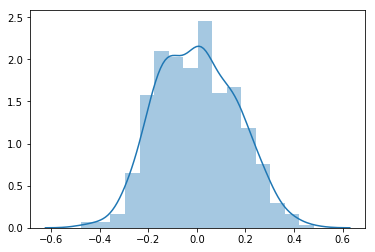

In [425]:
#Plotting the histogram for residuals
sns.distplot(y_train-y_train_pred)

Inferences to draw from the above model:
- Except Summer, all other variables have a low pvalue.
- VIF is still less than 2 for the variables 
- The model's R-squared and R-squared adjusted does not have much great of a difference, thus we could say that the model is stable.

Let's try RFE to decipher which all variables are significant

In [426]:
#The curve appears to be a normal, but is not exactly a bell shaped curve. Let's implement RFE to check significant variables.
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [427]:
# Running RFE with the output number of the variable equals to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [428]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 12),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('2019', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 11),
 ('Winter', True, 1),
 ('April', False, 4),
 ('August', False, 6),
 ('December', False, 21),
 ('February', False, 13),
 ('July', False, 15),
 ('June', False, 5),
 ('March', False, 3),
 ('May', False, 2),
 ('November', False, 18),
 ('October', False, 7),
 ('September', True, 1),
 ('holiday_Yes', True, 1),
 ('Friday', False, 17),
 ('Monday', False, 14),
 ('Saturday', False, 9),
 ('Thursday', False, 20),
 ('Tuesday', False, 16),
 ('Wednesday', False, 19),
 ('working_Yes', False, 10),
 ('weather_High', True, 1),
 ('weather_Low', True, 1),
 ('weather_Medium', False, 8)]

In [429]:
a=list(zip(X_train.columns,rfe.support_,rfe.ranking_))
for i in a:
    if 'True' in str(i):
        print(i)

('temp', True, 1)
('hum', True, 1)
('windspeed', True, 1)
('2019', True, 1)
('Spring', True, 1)
('Winter', True, 1)
('September', True, 1)
('holiday_Yes', True, 1)
('weather_High', True, 1)
('weather_Low', True, 1)


In [579]:
#Let's add the columns we found important from RFE
X_train_sm=X_train[['atemp','weather_Low','July','windspeed','hum']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     101.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           4.06e-74
Time:                        22:45:45   Log-Likelihood:                 216.98
No. Observations:                 510   AIC:                            -422.0
Df Residuals:                     504   BIC:                            -396.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3613      0.055      6.617      0.000       0.254       0.469
atemp           0.7376      0.038     19.261      0.000       0.662       0.813
weather_Low     0.0453      0.018      2.486      0.013       0.010       0.081
July           -0.1356      0.029     -4.627      0.000      -0.193      -0.078
windspeed      -0.2158      0.044     -4.868      0.000      -0.303      -0.129
hum            -0.2691      0.063     -4.245      0.000      -0.394      -0.145
==============================================================================
Omnibus:                        5.021   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                4.299
Skew:                           0.145   Prob(JB):                        0.117
Kurtosis:                       2.655   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [577]:
#Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,14.69
1,atemp,1.25
3,July,1.21
4,windspeed,1.05
2,weather_Low,1.02


#Inferences to be drawn:
- All variables are significant and have a low p-value
- All variables too have a low VIF value

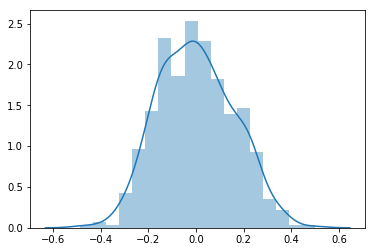

In [580]:
y_train_pred=lr_model.predict(X_train_sm)
sns.distplot(y_train-y_train_pred)

### Fitting the model on Test Data


In [583]:
#variables
bb_test.head()

,temp,atemp,hum,windspeed,cnt,2019,Spring,Summer,Winter,April,...,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,working_Yes,weather_High,weather_Low,weather_Medium
184,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
535,32.082500,36.04875,59.2083,7.625404,6211,1,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
299,19.270000,22.85230,81.2917,13.250121,2659,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
221,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
152,29.315000,32.19710,30.5000,19.583229,4968,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [584]:
bb_test.shape

(220, 31)

In [590]:
bb_test[variables]=scaler.transform(bb_test[variables])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [591]:
#Validating change
bb_test.describe()

,temp,atemp,hum,windspeed,cnt,2019,Spring,Summer,Winter,April,...,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,working_Yes,weather_High,weather_Low,weather_Medium
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154,0.481818,0.254545,0.263636,0.236364,0.090909,...,0.177273,0.127273,0.118182,0.163636,0.168182,0.100000,0.700000,0.027273,0.654545,0.318182
std,0.233187,0.217401,0.148694,0.159584,0.219163,0.500809,0.436599,0.441609,0.425817,0.288135,...,0.382770,0.334038,0.323559,0.370789,0.374881,0.300684,0.459303,0.163248,0.476601,0.466833
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [592]:
#Notice that the values do not exceed 1 and are above 0

In [593]:
#Creating y_test and X_test
y_test=bb_test.pop('cnt')
X_test=bb_test

In [594]:
X_test.head()

,temp,atemp,hum,windspeed,2019,Spring,Summer,Winter,April,August,...,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,working_Yes,weather_High,weather_Low,weather_Medium
184,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
535,0.901354,0.842587,0.610133,0.153728,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
299,0.511964,0.496145,0.837699,0.334206,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
221,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
152,0.817246,0.741471,0.314298,0.537414,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [1]:
0.361279+0.737611*0.769660+0.045324*1+(-0.135593)*0+(-0.215766)*0.084219+(-0.269084)*0.657364

0.7792549509300001

In [595]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [599]:
X_test_sm=X_test[['atemp','weather_Low','July','windspeed','hum']]

In [613]:
X_test_sm=sm.add_constant(X_test_sm)

In [614]:
X_test_sm.shape

(220, 6)

In [616]:
#Performing predictions
y_test_pred=lr_model.predict(X_test_sm)

### Evaluation of Model

In [622]:
#Checking r2-score
from sklearn.metrics import r2_score

In [633]:
#evaluate on test
r2_test=r2_score(y_true=y_test,y_pred=y_test_pred)
r2_test

0.45000677014564694

In [635]:
#evaluating on train
r2_train=r2_score(y_true=y_train,y_pred=y_train_pred)
r2_train

0.5025870518694786

In [639]:
#You can also check the mean squared method
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

0.02629753001946927

In [654]:
#y_test=y_test.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

### Evaluating Model through Graph

Text(0, 0.5, 'y_test_pred')

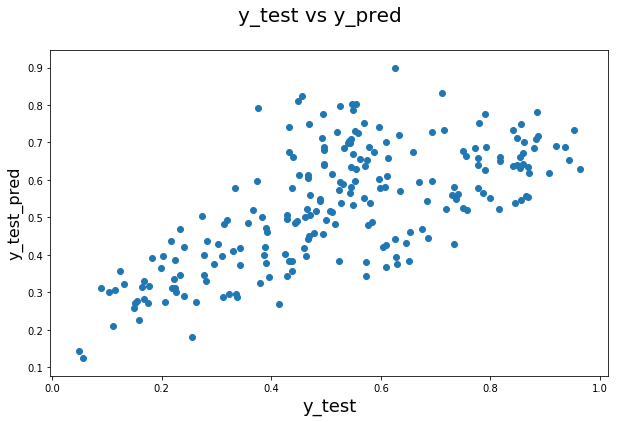

In [667]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=[10,6])
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [664]:
lr_model.params

const          0.361279
atemp          0.737611
weather_Low    0.045324
July          -0.135593
windspeed     -0.215766
hum           -0.269084
dtype: float64

The model thus is:

    cnt=0.361279+0.737611*atemp+0.045324*weather_low+(-0.135593)*July+(-0.215766)*windspeed+(-0.269084)*hum